In [1]:
import pandas as pd
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
regions = pd.read_csv('./temperature and precipitation/climate_region.csv')

In [3]:
regions.head()

,Name,MapDate,DSCI
0,High Plains,20001226,40
1,High Plains,20010102,40
2,High Plains,20010109,34
3,High Plains,20010116,32
4,High Plains,20010123,50


In [4]:
#regions = pd.get_dummies(regions, columns=['Name'])


In [5]:
regions.head()

,Name,MapDate,DSCI
0,High Plains,20001226,40
1,High Plains,20010102,40
2,High Plains,20010109,34
3,High Plains,20010116,32
4,High Plains,20010123,50


In [6]:
mean_dsci = regions.groupby('Name', as_index=False)['DSCI'].mean()

mean_dsci


,Name,DSCI
0,High Plains,116.851277
1,Midwest,45.239051
2,Northeast,30.758212
3,South,97.612226
4,Southeast,75.459854
5,West,104.249088


In [7]:
high_plains = regions[regions['Name'] == 'High Plains']

In [8]:
midwest = regions[regions['Name'] == 'Midwest']

In [9]:
northeast = regions[regions['Name'] == 'Northeast']

In [10]:
south = regions[regions['Name'] == 'South']

In [11]:
southeast = regions[regions['Name'] == 'Southeast']

In [12]:
west = regions[regions['Name'] == 'West']

In [13]:
def to_dt(reg):
    reg['MapDate'] = pd.to_datetime(reg['MapDate'], format = '%Y%m%d')

to_dt(high_plains)
to_dt(midwest)
to_dt(northeast)
to_dt(south)
to_dt(southeast)
to_dt(west)

<ipython-input-13-fb69e4f4ec22>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg['MapDate'] = pd.to_datetime(reg['MapDate'], format = '%Y%m%d')


In [14]:
high_plains.head()

,Name,MapDate,DSCI
0,High Plains,2000-12-26,40
1,High Plains,2001-01-02,40
2,High Plains,2001-01-09,34
3,High Plains,2001-01-16,32
4,High Plains,2001-01-23,50


In [15]:
def reset_idx(reg):
    reg.reset_index(inplace=True)
    reg.drop(columns = 'index', axis = 1, inplace = True)
    return reg
reset_idx(midwest)
reset_idx(northeast)
reset_idx(south)
reset_idx(southeast)
reset_idx(west)

/Users/sonnguyen/opt/anaconda3/envs/dsi-111/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Name,MapDate,DSCI
0,West,2000-12-26,17
1,West,2001-01-02,20
2,West,2001-01-09,26
3,West,2001-01-16,22
4,West,2001-01-23,37
...,...,...,...
1091,West,2021-11-23,210
1092,West,2021-11-30,212
1093,West,2021-12-07,210
1094,West,2021-12-14,208


In [16]:
northeast.head()

,Name,MapDate,DSCI
0,Northeast,2000-12-26,12
1,Northeast,2001-01-02,12
2,Northeast,2001-01-09,12
3,Northeast,2001-01-16,14
4,Northeast,2001-01-23,31


In [17]:
midwest.head()

,Name,MapDate,DSCI
0,Midwest,2000-12-26,20
1,Midwest,2001-01-02,19
2,Midwest,2001-01-09,23
3,Midwest,2001-01-16,23
4,Midwest,2001-01-23,45


In [18]:
def remove_first(data):
    data.drop([0], inplace = True)
    return data
remove_first(high_plains)
remove_first(midwest)
remove_first(northeast)
remove_first(south)
remove_first(southeast)
remove_first(west)

/Users/sonnguyen/opt/anaconda3/envs/dsi-111/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Name,MapDate,DSCI
1,West,2001-01-02,20
2,West,2001-01-09,26
3,West,2001-01-16,22
4,West,2001-01-23,37
5,West,2001-01-30,36
...,...,...,...
1091,West,2021-11-23,210
1092,West,2021-11-30,212
1093,West,2021-12-07,210
1094,West,2021-12-14,208


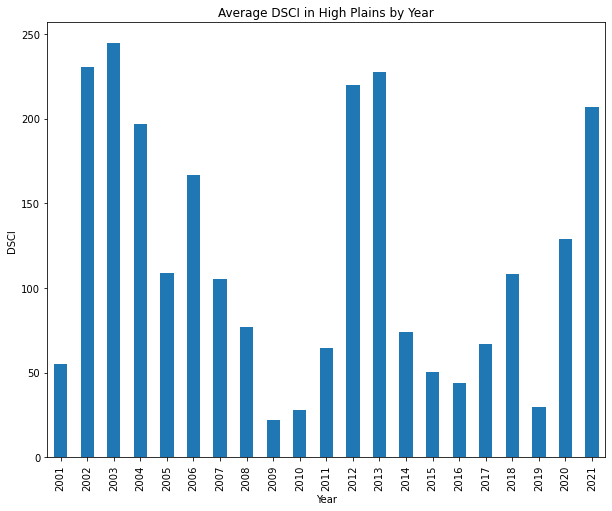

In [19]:
def plot_avg_dsci(reg):
    years = reg.groupby(reg['MapDate'].dt.year)['DSCI'].mean()
    years.plot(kind = 'bar', figsize = (10, 8))
    plt.xlabel("Year")
    plt.ylabel("DSCI")
    plt.title(f'Average DSCI in {reg["Name"].iloc[1]} by Year')
plot_avg_dsci(high_plains)

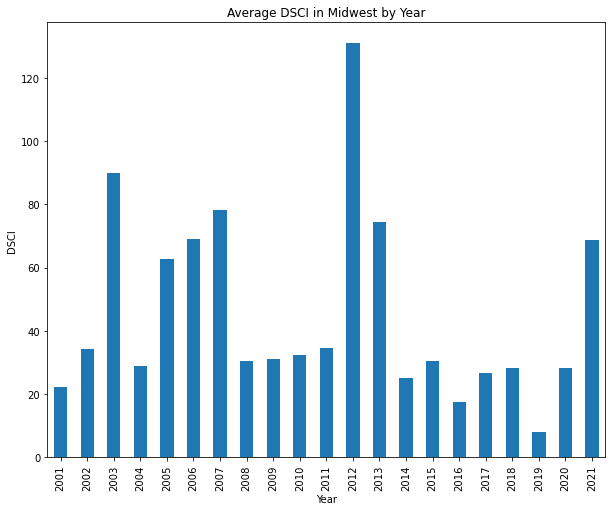

In [20]:
plot_avg_dsci(midwest)

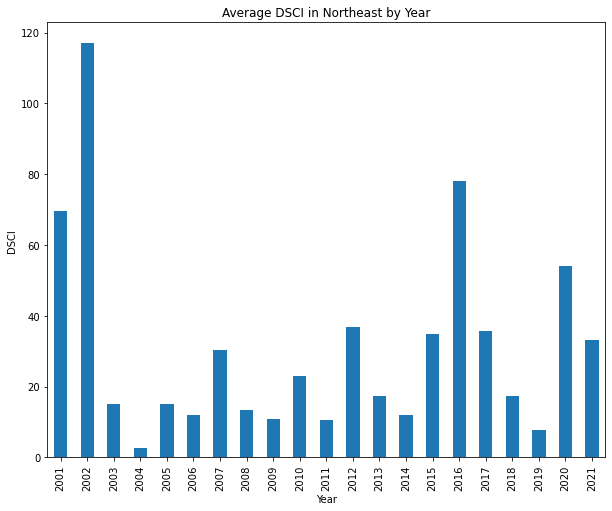

In [21]:
plot_avg_dsci(northeast)

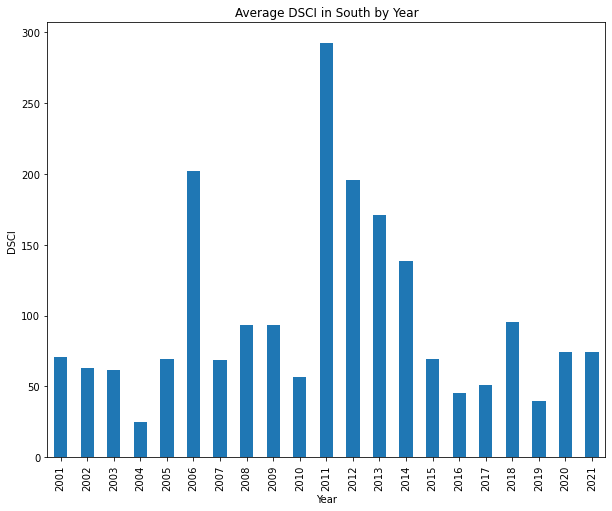

In [22]:
plot_avg_dsci(south)

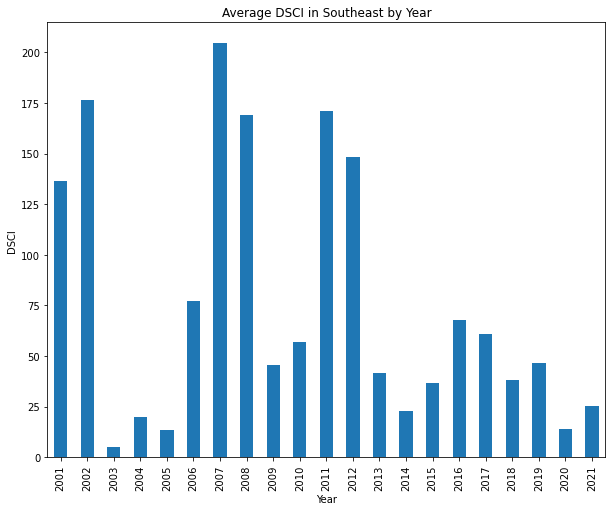

In [23]:
plot_avg_dsci(southeast)

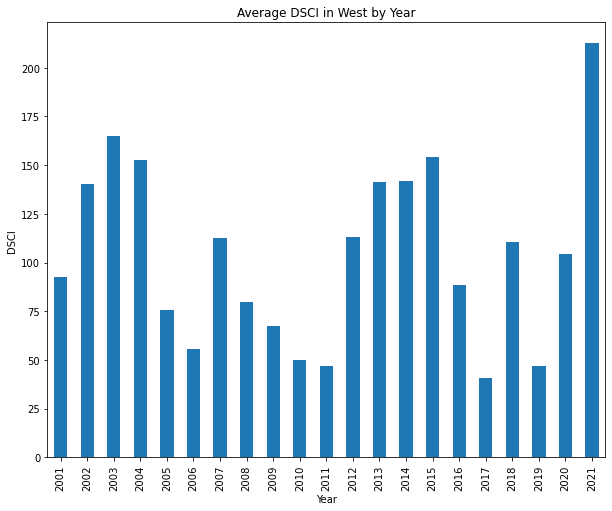

In [24]:
plot_avg_dsci(west)

In [25]:
high_plains.index = high_plains['MapDate']

Text(0.5, 1.0, 'High Plains Drought Severity since 2002')

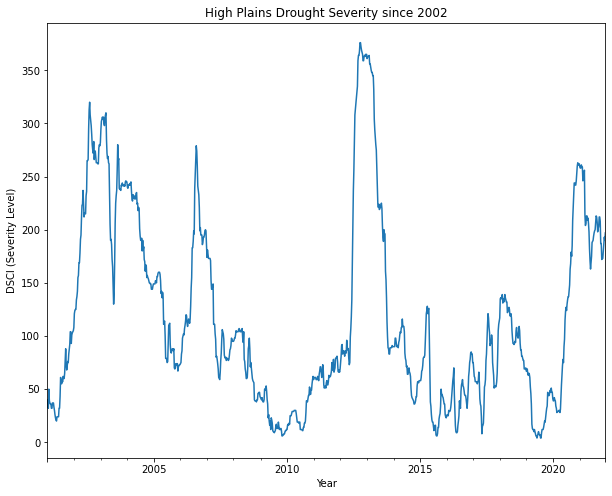

In [26]:
high_plains['DSCI'].plot(figsize = (10, 8))
plt.xlabel("Year")
plt.ylabel("DSCI (Severity Level)")
plt.title('High Plains Drought Severity since 2002')

In [27]:
def df_to_X_y(df, windowsize=5):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-windowsize):
        row = [[a] for a in df_as_np[i:i+5]]
        X.append(row)
        label = df_as_np[i+5]
        y.append(label)
    return np.array(X), np.array(y)

In [28]:
WINDOW_SIZE = 5
X, y = df_to_X_y(high_plains['DSCI'], WINDOW_SIZE)
X.shape, y.shape

((1090, 5, 1), (1090,))

In [29]:
X_train, y_train = X[:700], y[:700]
X_val, y_val = X[700:800], y[700:800]
X_test, y_test = X[800:], y[800:]

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5,1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                16896     
_________________________________________________________________
dense (Dense)                (None, 8)                 520       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [31]:
cp = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer = Adam(learning_rate=0.005), metrics=[RootMeanSquaredError()])

In [32]:
model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp])

Epoch 1/10
22/22 [==============================] - 6s 83ms/step - loss: 26537.9883 - root_mean_squared_error: 162.9048 - val_loss: 2490.9661 - val_root_mean_squared_error: 49.9096


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 2/10
22/22 [==============================] - 0s 9ms/step - loss: 24191.8398 - root_mean_squared_error: 155.5373 - val_loss: 1661.0737 - val_root_mean_squared_error: 40.7563


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 3/10
22/22 [==============================] - 0s 9ms/step - loss: 20803.6152 - root_mean_squared_error: 144.2346 - val_loss: 998.3323 - val_root_mean_squared_error: 31.5964


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 4/10
22/22 [==============================] - 0s 6ms/step - loss: 17049.7988 - root_mean_squared_error: 130.5749 - val_loss: 482.5354 - val_root_mean_squared_error: 21.9667


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 5/10
22/22 [==============================] - 0s 7ms/step - loss: 13219.9531 - root_mean_squared_error: 114.9781 - val_loss: 205.3122 - val_root_mean_squared_error: 14.3287


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 6/10
22/22 [==============================] - 0s 7ms/step - loss: 9954.7842 - root_mean_squared_error: 99.7737 - val_loss: 85.7829 - val_root_mean_squared_error: 9.2619


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 7/10
22/22 [==============================] - 0s 6ms/step - loss: 7141.7407 - root_mean_squared_error: 84.5088 - val_loss: 92.1805 - val_root_mean_squared_error: 9.6011
Epoch 8/10
22/22 [==============================] - 0s 6ms/step - loss: 5029.4580 - root_mean_squared_error: 70.9187 - val_loss: 70.4116 - val_root_mean_squared_error: 8.3912


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 9/10
22/22 [==============================] - 0s 6ms/step - loss: 3453.5542 - root_mean_squared_error: 58.7669 - val_loss: 74.2334 - val_root_mean_squared_error: 8.6159
Epoch 10/10
22/22 [==============================] - 0s 6ms/step - loss: 2397.6470 - root_mean_squared_error: 48.9658 - val_loss: 67.5559 - val_root_mean_squared_error: 8.2192


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


In [33]:
from tensorflow.keras.models import load_model
model1 = load_model("model1/")

In [34]:
train_predictions = model1.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals': y_train})
train_results

,Train Predictions,Actuals
0,38.605530,37
1,38.186764,36
2,36.635342,36
3,37.106510,32
4,31.274055,32
...,...,...
695,112.960068,104
696,104.912109,84
697,83.342796,79
698,80.625854,77


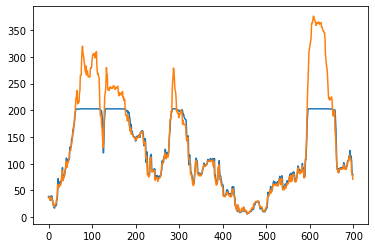

In [35]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'])
plt.plot(train_results['Actuals'])

In [36]:
val_predictions = model1.predict(X_val).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals': y_val})
val_results

,Val Predictions,Actuals
0,72.758743,72
1,74.789413,64
2,66.010933,64
3,67.215225,69
4,73.093430,70
...,...,...
95,30.268229,16
96,15.252517,10
97,7.813084,9
98,7.937778,9


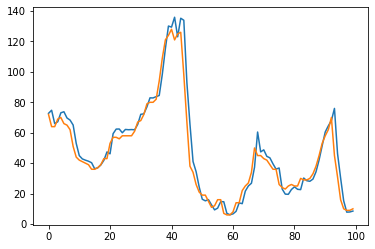

In [37]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])

In [38]:
test_predictions = model1.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':val_predictions, 'Actuals': y_val})
test_results

,Test Predictions,Actuals
0,72.758743,72
1,74.789413,64
2,66.010933,64
3,67.215225,69
4,73.093430,70
...,...,...
95,30.268229,16
96,15.252517,10
97,7.813084,9
98,7.937778,9


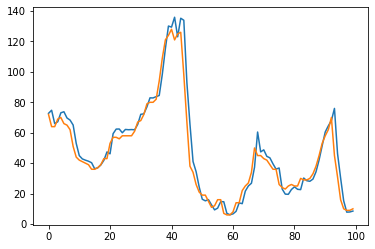

In [39]:
plt.plot(test_results['Test Predictions'])
plt.plot(test_results['Actuals'])